<a href="https://colab.research.google.com/github/DivyamThapliyal07/Projects/blob/main/Customer_Segmentation_using_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df= pd.read_csv("/content/Mall_Customers.csv")

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


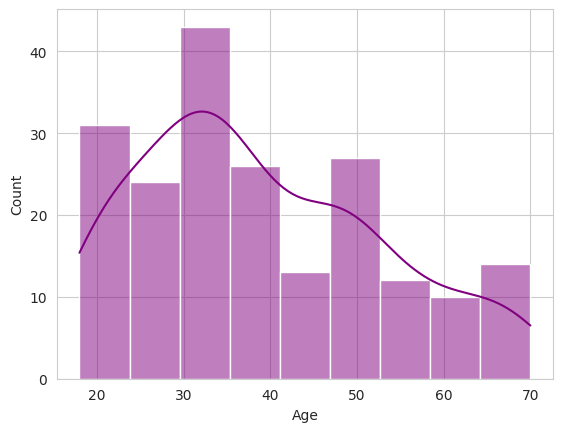

In [10]:
sns.set_style("whitegrid")
sns.histplot(data= df, x="Age", color="purple", kde=True)
plt.show()

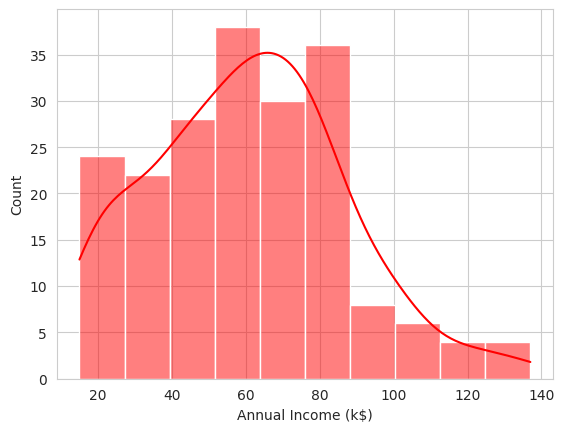

In [11]:
sns.histplot(data=df, x="Annual Income (k$)", kde=True, color="red")
plt.show()

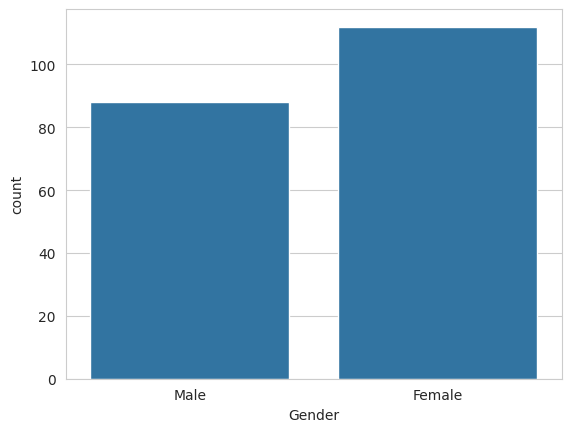

In [12]:
sns.countplot(data=df, x="Gender")
plt.show()

In [13]:
df= df.drop(["CustomerID"], axis= 1)

/tmp/ipython-input-3301802141.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x= "Annual Income (k$)", y="Spending Score (1-100)", data=df, palette="rainbow")


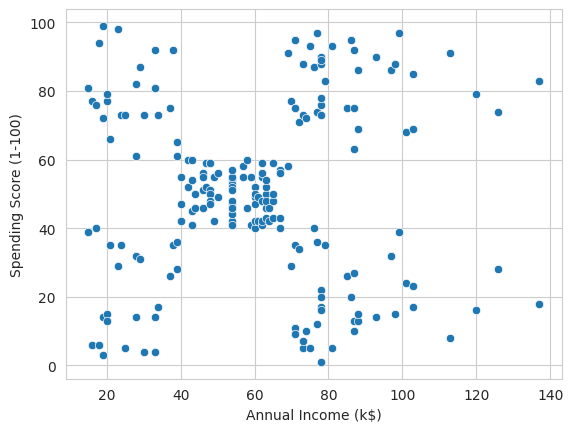

In [19]:
sns.scatterplot(x= "Annual Income (k$)", y="Spending Score (1-100)", data=df, palette="rainbow")
plt.show()

# Task
Apply K-means clustering to the data in the file "customer_data.csv" to identify customer segments. Determine the optimal number of clusters using the Elbow method and visualize the resulting clusters.

## Feature selection

### Subtask:
Select the relevant features for K-means clustering.


**Reasoning**:
Based on the problem description which is about customer segmentation, the relevant features are likely 'Annual Income (k$)' and 'Spending Score (1-100)'. I will select these columns for clustering analysis.



In [20]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

## Elbow method

### Subtask:
Use the Elbow method to determine the optimal number of clusters (k).


**Reasoning**:
Import KMeans, create an empty list for inertia, and iterate through different numbers of clusters to calculate and store the inertia values.



In [21]:
from sklearn.cluster import KMeans

inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

**Reasoning**:
Plot the inertia values against the number of clusters to visualize the elbow curve.



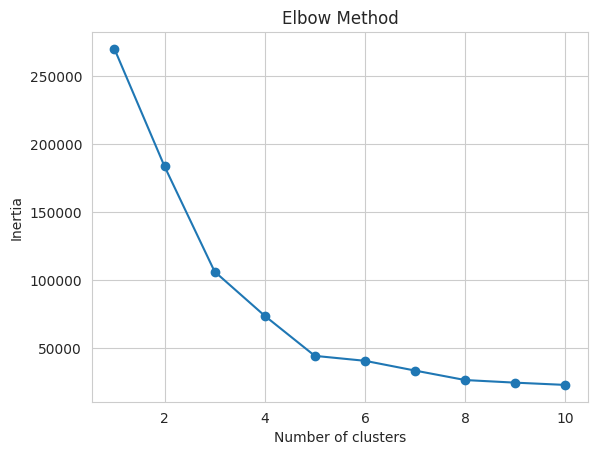

In [22]:
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

## Apply k-means

### Subtask:
Apply the K-means algorithm with the optimal number of clusters.


**Reasoning**:
Instantiate a KMeans object with the optimal number of clusters and fit it to the data, then add the cluster labels to the dataframe.



In [23]:
kmeans = KMeans(n_clusters=5, n_init='auto', random_state=42)
kmeans.fit(X)
df['Cluster'] = kmeans.labels_

## Visualize clusters

### Subtask:
Visualize the clusters to interpret the results.


**Reasoning**:
Create a scatter plot to visualize the clusters based on annual income and spending score, using the 'Cluster' column for color differentiation.



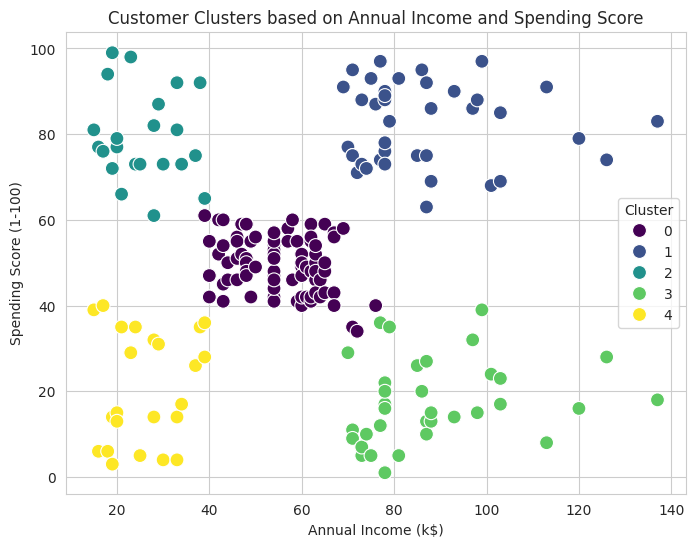

In [24]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df, hue="Cluster", palette="viridis", s=100)
plt.title('Customer Clusters based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

In [35]:
import plotly.express as px

fig = px.scatter_3d(df, x="Annual Income (k$)", y="Spending Score (1-100)", z="Age",
                    color = 'Cluster', size = 'Cluster')
fig.show()

## Summary:

### Data Analysis Key Findings
* The Elbow method plot suggested that 5 is the optimal number of clusters for this dataset, as indicated by the bend in the curve at this point.
* After applying K-means clustering with 5 clusters, the customers were successfully segmented based on their 'Annual Income (k\$)' and 'Spending Score (1-100)'.
* The visualization of the clusters clearly shows distinct groups of customers with different combinations of annual income and spending score.

### Insights or Next Steps
* Analyze the characteristics of each identified customer cluster to understand the different customer segments.
* Consider using additional features for clustering to potentially identify more nuanced customer segments.
